# Support Vector Machines

## Using SVMs for Facial Recognition

In [1]:
#importing the the libs and data also cropping the images

import numpy as np
import pandas as pd
from sklearn.datasets import fetch_lfw_people


faces = fetch_lfw_people(min_faces_per_person=100,slice_=None)
faces.images = faces.images[:, 35:97, 39:86]
faces.data = faces.images.reshape(faces.images.shape[0],faces.images.shape[1] * faces.images.shape[2])
print(faces.target_names)
print(faces.images.shape)

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']
(1140, 62, 47)


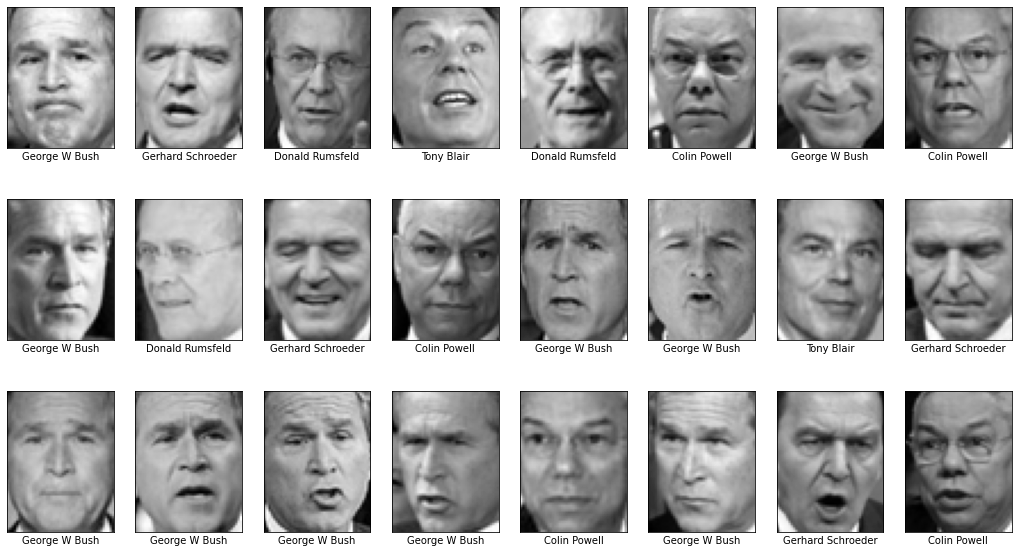

In [2]:
#Showing the first 24 images in the dataset

%matplotlib inline

import matplotlib.pyplot as plt

fig, ax = plt.subplots(3,8, figsize=(18,10))

for i, axi in enumerate(ax.flat):
  axi.imshow(faces.images[i],cmap="gist_gray")
  axi.set(xticks=[],yticks=[],xlabel=faces.target_names[faces.target[i]])


In [3]:
#checking the balance in the dataset using a histogram

import seaborn as sns
sns.set()

<Axes: >

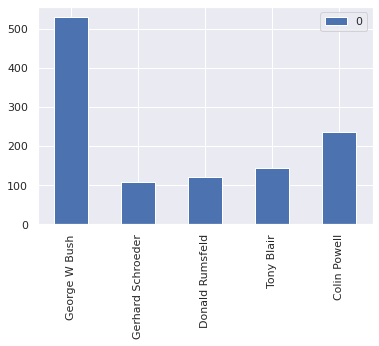

In [4]:
from collections import Counter

counts = Counter(faces.target)
names = {}

for key in counts.keys():
  names[faces.target_names[key]] = counts[key]

df = pd.DataFrame.from_dict(names,orient="index")
df.plot(kind="bar")

In [6]:
#There are way more images of George W. Bush than anyone else in the dataset

#reducing the dataset to 100 images per person


mask = np.zeros(faces.target.shape,dtype=bool)

for target in np.unique(faces.target):
  mask[np.where(faces.target == target)[0][:100]] = 1


x = faces.data[mask]
y = faces.target[mask]

x.shape


(500, 2914)

In [7]:
#Using an SVM model to see if it can classify the images

#Training on three models: linear, poly, RBF kernel and using GridSearch to optimize hyperparameters


from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC(kernel="linear")

grid ={
    "C" : [0.1,1,10,100]
}

grid_search = GridSearchCV(estimator=svc,param_grid=grid,cv=5,verbose=2)
grid_search.fit(x,y)

grid_search.best_score_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ..............................................C=0.1; total time=   0.3s
[CV] END ..............................................C=0.1; total time=   0.3s
[CV] END ..............................................C=0.1; total time=   0.4s
[CV] END ..............................................C=0.1; total time=   0.3s
[CV] END ..............................................C=0.1; total time=   0.2s
[CV] END ................................................C=1; total time=   0.2s
[CV] END ................................................C=1; total time=   0.2s
[CV] END ................................................C=1; total time=   0.2s
[CV] END ................................................C=1; total time=   0.3s
[CV] END ................................................C=1; total time=   0.3s
[CV] END ...............................................C=10; total time=   0.3s
[CV] END ........................................

0.842

In [8]:
#Standardizing the data to see if we can improve the score

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

svc = SVC(kernel="linear")

pipe = make_pipeline(scaler,svc)

grid = {
    "svc__C" : [0.1,1,10,100]
}

grid_search = GridSearchCV(estimator=pipe,param_grid=grid,cv=5,verbose=2)
grid_search.fit(x,y)
grid_search.best_score_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .........................................svc__C=0.1; total time=   0.3s
[CV] END .........................................svc__C=0.1; total time=   0.3s
[CV] END .........................................svc__C=0.1; total time=   0.3s
[CV] END .........................................svc__C=0.1; total time=   0.2s
[CV] END .........................................svc__C=0.1; total time=   0.3s
[CV] END ...........................................svc__C=1; total time=   0.3s
[CV] END ...........................................svc__C=1; total time=   0.2s
[CV] END ...........................................svc__C=1; total time=   0.2s
[CV] END ...........................................svc__C=1; total time=   0.3s
[CV] END ...........................................svc__C=1; total time=   0.3s
[CV] END ..........................................svc__C=10; total time=   0.3s
[CV] END ........................................

0.8560000000000001

In [9]:
# Looking at the best C value


grid_search.best_params_

{'svc__C': 0.1}

In [10]:
#Checking if poly can do a better job

scaler = StandardScaler()

svc = SVC(kernel="poly")

pipe = make_pipeline(scaler,svc)

grid = {
    "svc__C" : [0.1,1,10,100],
    "svc__gamma" :[0.01,0.25,0.5,0.75,1],
    "svc__degree":[1,2,3,4,5]
}

grid_search = GridSearchCV(estimator=pipe,param_grid=grid,cv=5,verbose=2)
grid_search.fit(x,y)
grid_search.best_score_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.01; total time=   0.3s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.01; total time=   0.5s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.01; total time=   0.5s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.01; total time=   0.2s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.01; total time=   0.2s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.25; total time=   0.2s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.25; total time=   0.2s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.25; total time=   0.2s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.25; total time=   0.2s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.25; total time=   0.2s
[CV] END ..........svc__C=0.1, svc__degree=1, svc__gamma=0.5; total time=   0.2s
[CV] END ..........svc__C=0.1, svc__degree=1, 

0.8560000000000001

In [11]:
#Viewing the parameter values that led to this result

grid_search.best_params_

{'svc__C': 0.1, 'svc__degree': 1, 'svc__gamma': 0.25}

In [12]:
#the score is the same as the linear score. The optimum value of the degree was 1 which means the poly kernel acted like a linear kernel


In [13]:
#Trying RBF kernel

scaler = StandardScaler()

svc = SVC(kernel="rbf")

pipe = make_pipeline(scaler,svc)

grid = {
    "svc__C" : [0.1,1,10,100],
    "svc__gamma" :[0.01,0.25,0.5,0.75,1.0]
}

grid_search = GridSearchCV(estimator=pipe,param_grid=grid,cv=5,verbose=2)
grid_search.fit(x,y)
grid_search.best_score_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ........................svc__C=0.1, svc__gamma=0.01; total time=   0.6s
[CV] END ........................svc__C=0.1, svc__gamma=0.01; total time=   0.6s
[CV] END ........................svc__C=0.1, svc__gamma=0.01; total time=   0.4s
[CV] END ........................svc__C=0.1, svc__gamma=0.01; total time=   0.4s
[CV] END ........................svc__C=0.1, svc__gamma=0.01; total time=   0.4s
[CV] END ........................svc__C=0.1, svc__gamma=0.25; total time=   0.4s
[CV] END ........................svc__C=0.1, svc__gamma=0.25; total time=   0.4s
[CV] END ........................svc__C=0.1, svc__gamma=0.25; total time=   0.4s
[CV] END ........................svc__C=0.1, svc__gamma=0.25; total time=   0.4s
[CV] END ........................svc__C=0.1, svc__gamma=0.25; total time=   0.5s
[CV] END .........................svc__C=0.1, svc__gamma=0.5; total time=   0.5s
[CV] END .........................svc__C=0.1, s

0.472

In [14]:
#it looks like the linear kernel was the best

In [16]:
#splitting the data into training and test datasets

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,stratify=y,random_state=0)

In [17]:
#training a linear SVM with the optimum C value 

scaler = StandardScaler()

svc = SVC(kernel="linear",C=0.1)
pipe = make_pipeline(scaler,svc)
pipe.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.1, kernel='linear'))])

In [18]:
#using cross validation to confirm the accuracy

from sklearn.model_selection import cross_val_score

cross_val_score(pipe,x,y,cv=5).mean()

0.8560000000000001

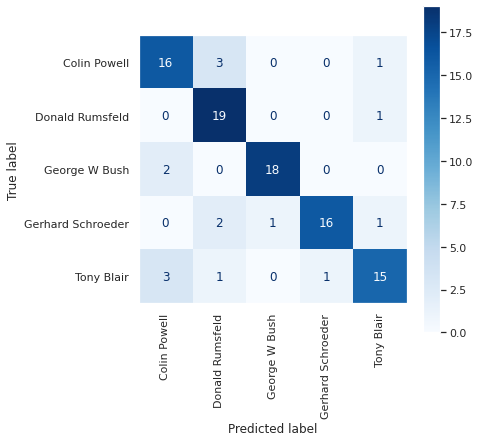

In [19]:
#Using a confusion matrix to see how the model performs on the test data

from sklearn.metrics import ConfusionMatrixDisplay as cmd

fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
cmd.from_estimator(pipe,x_test,y_test,display_labels=faces.target_names,cmap="Blues",xticks_rotation="vertical",ax=ax)

In [20]:
#This shows that SVM do a good job of images classification NN with CNN is still better